In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np
plt.rcParams['font.family'] = 'SimSun'



In [43]:

# 读取数据
# data = pd.read_excel('../data/Q2_a.xlsx')
data = pd.read_excel('../data/lwj/2a_sp.xlsx')
# 特征工程:提取时间和水肿体积
X = data[['发病到首次影像检查时间间隔']]
y = data[['ED_volume']]

# 线性回归

In [89]:

# 构建线性回归模型
lr = LinearRegression()

# 训练模型
lr.fit(X, y)

# 获取拟合的系数
print('模型Slope:', lr.coef_)
print('模型Intercept:', lr.intercept_)

# 预测水肿体积
y_pred = lr.predict(X)
residual_linear = y - y_pred
# residual_linear.__class__

模型Slope: [[212.47294537]]
模型Intercept: [17173.62318599]


In [90]:
# 添加至最后一列
data['residual_linear'] = residual_linear
data

,发病到首次影像检查时间间隔,ED_volume,残差,residual_linear,age,cluster,residual_gaussian
0,2.500000,48919,21553.909057,31214.194451,43,0,32813.565354
1,3.000000,23526,-3837.806133,5714.957978,58,3,7230.702609
2,2.000000,32621,5254.624248,15022.430923,78,2,16704.173607
3,1.000000,22191,-5177.945372,4804.903869,70,1,6647.595474
4,5.000000,47392,20033.333106,29156.012087,51,3,30324.875390
...,...,...,...,...,...,...,...
155,9.029167,32460,5111.686532,13367.923178,87,2,13779.861595
156,14.615833,8452,-18881.957861,-11827.092343,52,3,-12583.511499
157,21.660000,18889,-8426.857032,-2886.787183,57,3,-5284.036630
158,46.111389,3226,-24027.026266,-23745.045798,47,0,-32473.966604


In [91]:
t = pd.read_excel('../data/temp1.xlsx')


#根据年龄
age = t[['年龄']]
#转换一下
table = data
table['age'] = age











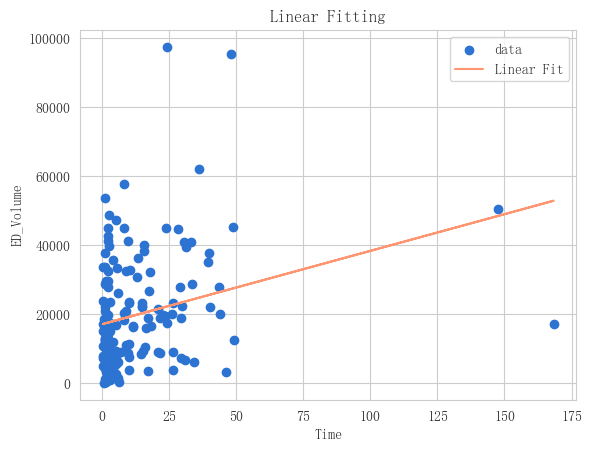

D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: y=257.07x+14041.04
Cluster 1: y=407.94x+17286.11
Cluster 2: y=55.35x+19000.35
Cluster 3: y=147.12x+18235.30


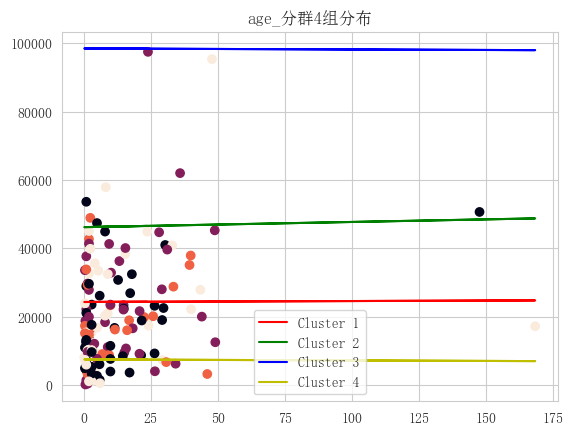

In [117]:
X = data[['发病到首次影像检查时间间隔']]
y = data[['ED_volume']]
# 可视化拟合效果
plt.scatter(X, y,color='#2C73D2',marker='o')
plt.plot(X, y_pred, color='#FF9671')
plt.xlabel('Time')
plt.ylabel('ED_Volume')
plt.title('Linear Fitting')
plt.legend(['data', 'Linear Fit'])
plt.savefig('./figs/100_线性拟合.png')
plt.show()

# # 绘制残差分布图
# plt.title('残差分布图')
# plt.hist(residual_linear,color='#B39CD0')
# plt.savefig('./figs/线性残差分布.png')
# plt.show()

# K-Means进行分群
kmeans = KMeans(n_clusters=4)

# 训练,获得标签
clusters = kmeans.fit_predict(age.values.reshape(-1, 1))

# 添加分群结果到原始数据
data['cluster'] = clusters



# 分析各群体大小
clusters_size = data.groupby('cluster').size()
clusters_size.to_excel('./excels/age_各群体大小.xlsx',index=True)


# 每组单独建模
for i in range(4):
    Xi = X[data['cluster'] == i]
    yi = y[data['cluster'] == i]
    model = LinearRegression()
    model.fit(Xi, yi)
    coef = model.coef_[0][0]  # 提取系数的标量值
    intercept = model.intercept_[0]  # 提取截距的标量值
    print(f'Cluster {i}: y={coef:.2f}x+{intercept:.2f}')

# Cluster 0: y=-2.95x+7545.38
# Cluster 1: y=15.19x+46199.63
# Cluster 2: y=-2.91x+98489.66
# Cluster 3: y=2.47x+24394.40

y1 = 2.78 * X + 24297.38
y2 = 15.19 * X + 46199.63
y3 = -2.91 * X + 98489.66
y4 = -2.92 * X + 7490.39
# 绘制分群结果
plt.scatter(X, y, c=clusters)  # 散点图
plt.plot(X, y1, label='Cluster 1', c='r')  # 第一组拟合线
plt.plot(X, y2, label='Cluster 2', c='g')  # 第二组拟合线
plt.plot(X, y3, label='Cluster 3', c='b')  # 第三组拟合线
plt.plot(X, y4, label='Cluster 4', c='y')  # 第四组拟合线

plt.title('age_分群4组分布')
plt.legend()
plt.savefig('./figs/age_线性分群4组.png')
plt.show()

C:\Users\wwx\AppData\Local\Temp\ipykernel_50520\712123750.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q2_age_高斯分布.png', dmi=400)


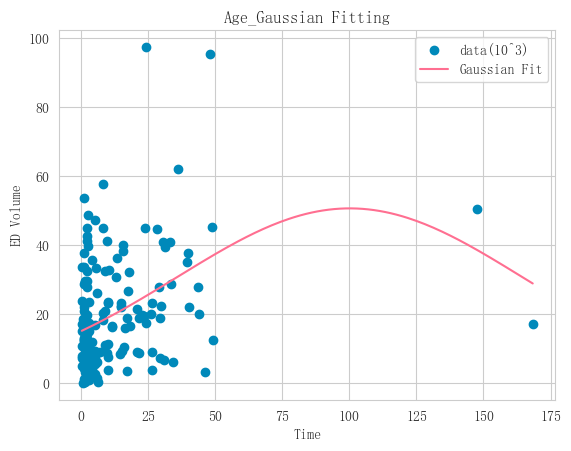

Amplitude (a): 50.72858986165879
Mean (b): 100.14674398000314
Standard Deviation (c): 64.46117377615437


In [118]:
X = X.values.flatten()
y = y.values.flatten()

y = y /1000


from scipy.optimize import curve_fit

# 定义高斯函数
def gaussian_function(x, a, b, c):
    return a * np.exp(-(x - b) ** 2 / (2 * c ** 2))


# 使用curve_fit拟合高斯函数
params, covariance = curve_fit(gaussian_function, X, y, p0=[1, np.mean(X), 1])

# 获取拟合参数
a, b, c = params

# 生成一系列x值用于绘制拟合曲线
x_fit = np.linspace(X.min(), X.max(), 160)

# 预测水肿体积
y_pred_gaussian = gaussian_function(x_fit, a, b, c)

# 可视化拟合效果，只显示一条拟合曲线和散点图
plt.scatter(X, y, color='#0089BA')
plt.plot(x_fit, y_pred_gaussian, color='#FF6F91')
plt.xlabel('Time')
plt.ylabel('ED Volume')
plt.title('Age_Gaussian Fitting')
plt.legend(['data(10^3)', 'Gaussian Fit'])
plt.savefig('./figs/Q2_age_高斯分布.png', dmi=400)
plt.show()

# 输出拟合的参数
print(f'Amplitude (a): {a}')
print(f'Mean (b): {b}')
print(f'Standard Deviation (c): {c}')


(160,)

In [121]:

# 预测ED_Volume
y_pred_gaussian = gaussian_function(X, a, b, c)
residual_gaussian = y - y_pred_gaussian
data['residual_gaussian'] = residual_gaussian
data

,发病到首次影像检查时间间隔,ED_volume,残差,residual_linear,age,cluster,residual_gaussian
0,2.500000,48919,21553.909057,31214.194451,43,2,32.813552
1,3.000000,23526,-3837.806133,5714.957978,58,0,7.230690
2,2.000000,32621,5254.624248,15022.430923,78,3,16.704159
3,1.000000,22191,-5177.945372,4804.903869,70,1,6.647580
4,5.000000,47392,20033.333106,29156.012087,51,0,30.324865
...,...,...,...,...,...,...,...
155,9.029167,32460,5111.686532,13367.923178,87,3,13.779857
156,14.615833,8452,-18881.957861,-11827.092343,52,0,-12.583507
157,21.660000,18889,-8426.857032,-2886.787183,57,0,-5.284019
158,46.111389,3226,-24027.026266,-23745.045798,47,2,-32.473905


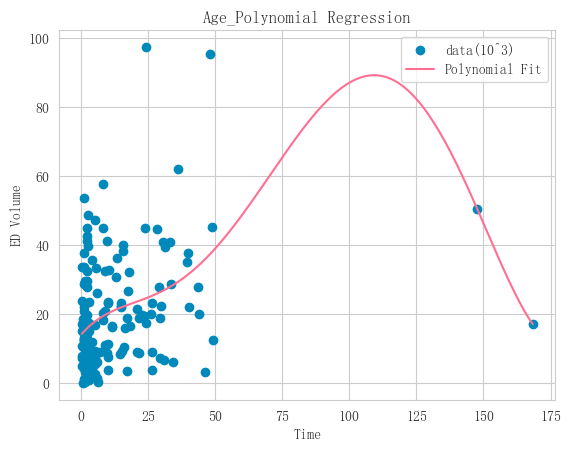

Polynomial Coefficients: [ 1.81441989e-08 -7.29307334e-06  9.04863205e-04 -3.75099275e-02
  9.10970759e-01  1.41411903e+01]


In [122]:
# 多项式回归
import numpy as np
import matplotlib.pyplot as plt


# 使用numpy.polyfit进行多项式回归
degree = 5  # 指定多项式的次数，可以根据需要更改
coefficients = np.polyfit(X, y, degree)

# 使用多项式函数生成预测值
y_pred_poly = np.polyval(coefficients, x_fit)




# 可视化多项式拟合效果，只显示一条拟合曲线和散点图
plt.scatter(X, y, color='#0089BA')
plt.plot(x_fit, y_pred_poly, color='#FF6F91')
plt.xlabel('Time')
plt.ylabel('ED Volume')
plt.title('Age_Polynomial Regression')
plt.legend(['data(10^3)', 'Polynomial Fit'])
plt.savefig('./figs/Q2_age_多项式回归.png', dpi=400)
plt.show()

# 输出多项式拟合的系数
print(f'Polynomial Coefficients: {coefficients}')

In [123]:
residual_poly = y[:160] - y_pred_poly
data['residual_poly'] = residual_poly
data

,发病到首次影像检查时间间隔,ED_volume,残差,residual_linear,age,cluster,residual_gaussian,residual_poly
0,2.500000,48919,21553.909057,31214.194451,43,2,32.813552,34.552397
1,3.000000,23526,-3837.806133,5714.957978,58,0,7.230690,8.255939
2,2.000000,32621,5254.624248,15022.430923,78,3,16.704159,16.523606
3,1.000000,22191,-5177.945372,4804.903869,70,1,6.647580,5.336353
4,5.000000,47392,20033.333106,29156.012087,51,0,30.324865,29.844350
...,...,...,...,...,...,...,...,...
155,9.029167,32460,5111.686532,13367.923178,87,3,13.779857,9.893107
156,14.615833,8452,-18881.957861,-11827.092343,52,0,-12.583507,-12.647789
157,21.660000,18889,-8426.857032,-2886.787183,57,0,-5.284019,-0.821425
158,46.111389,3226,-24027.026266,-23745.045798,47,2,-32.473905,-15.180276


In [124]:

data.to_excel('./excels/100_线性、高斯和多项式残差对比.xlsx',index=False)

In [126]:
# y_pred_poly = y_pred_poly.shape()
print(f'y_pred_poly {y_pred_poly.shape}')
residual_poly = y[:160] - y_pred_poly
print(residual_poly)

y_pred_poly (160,)
[ 34.55239724   8.25593935  16.52360563   5.33635292  29.84435045
  79.32097693  13.67081767  -4.9433383   -0.98750108  -4.96648282
 -15.57690055  -5.79217911 -11.71655398  -9.4630742  -16.32160521
   6.56116825 -11.16426073   0.89577587 -12.18088183 -23.42122454
 -11.02507663 -18.71509907  18.24720778 -15.48849881 -16.06340672
  -4.38655194 -18.55682139  -9.65395583  18.28644729  -8.66206909
 -10.14282447 -27.20100372 -26.93665989 -17.99371716 -14.14797366
 -13.3541044  -10.69566409 -26.89409007 -15.79270516 -28.21072053
 -28.1512386  -21.10825594 -13.89166606  -9.47626239 -29.95774109
   0.37629603 -32.31466134 -34.59203487 -36.03816055 -32.13229146
 -25.12260073 -35.88818437 -27.18306419 -32.36319064 -30.63844568
 -17.43764572 -40.19554444 -37.87783567 -49.0931563  -18.03108913
 -37.62916579 -43.76486954 -47.51463822 -49.08586711 -12.44191178
 -38.40209101 -55.66668962 -46.4259614  -20.93413193 -55.32040154
 -36.85794808 -55.48092989 -63.07148863 -38.89175219 -51.

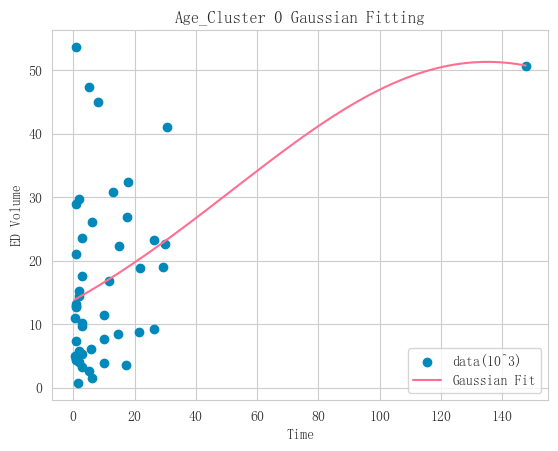

Cluster 0 Gaussian Fit Parameters:
Amplitude (a): 51.27331496975255
Mean (b): 135.11425055811858
Standard Deviation (c): 83.23667624370572


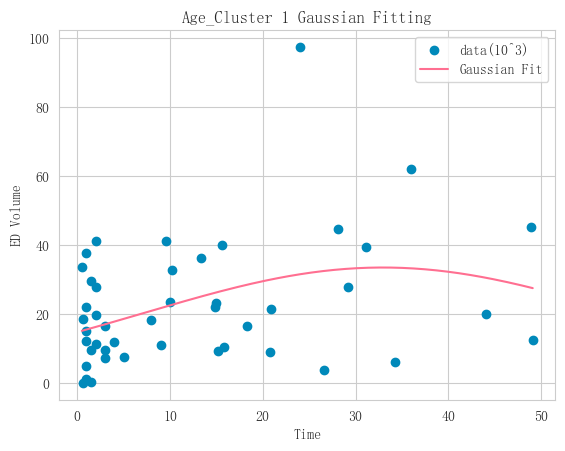

Cluster 1 Gaussian Fit Parameters:
Amplitude (a): 33.59481704616874
Mean (b): 32.95161994502466
Standard Deviation (c): 25.819625143280536


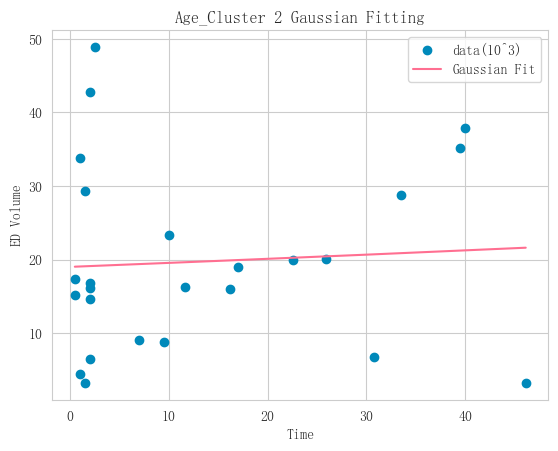

Cluster 2 Gaussian Fit Parameters:
Amplitude (a): 1307.4492373921878
Mean (b): 3009.2212110704277
Standard Deviation (c): 1034.4160809600796


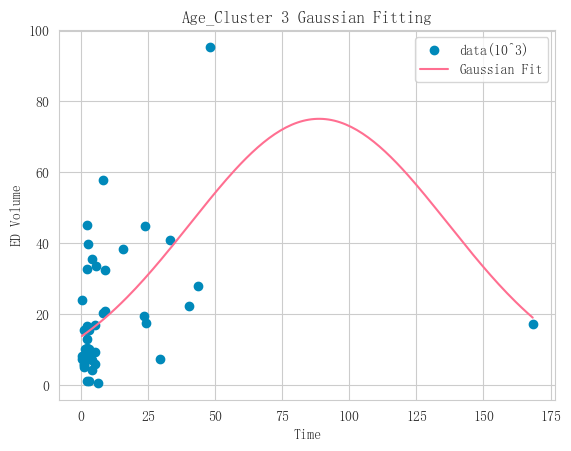

Cluster 3 Gaussian Fit Parameters:
Amplitude (a): 75.08829086620496
Mean (b): 88.71331869114982
Standard Deviation (c): 48.00894601384359


In [127]:
# 对每个类别分别进行拟合
from scipy.optimize import curve_fit

# 定义高斯函数
def gaussian_function(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))


# 遍历每个 cluster 进行拟合和预测
for i in range(4):
    Xi = X[data['cluster'] == i]
    yi = y[data['cluster'] == i]

    # 使用curve_fit拟合高斯函数
    params, covariance = curve_fit(gaussian_function, Xi, yi, p0=[1, np.mean(Xi), 1], maxfev=5000)

    # 获取拟合参数
    a, b, c = params
    # 生成一系列x值用于绘制拟合曲线
    x_fit = np.linspace(Xi.min(), Xi.max(), 160)

    # 预测水肿体积
    y_pred_gaussian_cluster = gaussian_function(x_fit, a, b, c)
    # 将 y_pred_gaussian_cluster 转换为 DataFrame
    df_y_pred = pd.DataFrame({'ED_Volume': y_pred_gaussian_cluster})

    # 添加 cluster 列
    df_y_pred['cluster'] = i

    # 生成文件名并保存 DataFrame 到 CSV 文件
    df_y_pred.to_csv(f'./excels/age_ED_Volume_each_gaussian_cluster[{i}]', index=False)


    # 可视化拟合效果
    plt.scatter(Xi, yi, color='#0089BA')
    plt.plot(x_fit, y_pred_gaussian_cluster, color='#FF6F91')
    plt.xlabel('Time')
    plt.ylabel('ED Volume')
    plt.title(f'Age_Cluster {i} Gaussian Fitting')
    plt.legend(['data(10^3)', 'Gaussian Fit'])
    plt.savefig(f'./figs/Q2_age_cluster{i}拟合.png')
    plt.show()

    # 输出拟合的参数
    print(f'Cluster {i} Gaussian Fit Parameters:')
    print(f'Amplitude (a): {a}')
    print(f'Mean (b): {b}')
    print(f'Standard Deviation (c): {c}')


C:\Users\wwx\AppData\Local\Temp\ipykernel_50520\2343001955.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(f'./figs/Q2_age_poly_cluster{i}拟合.png')
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


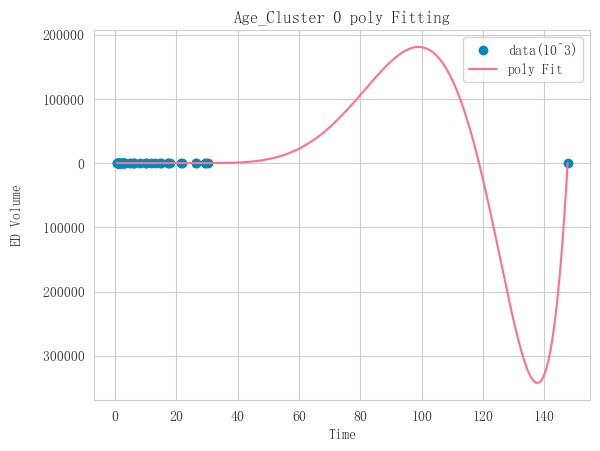

Cluster 0 poly Fit Parameters:
Amplitude (a): 75.08829086620496
Mean (b): 88.71331869114982
Standard Deviation (c): 48.00894601384359


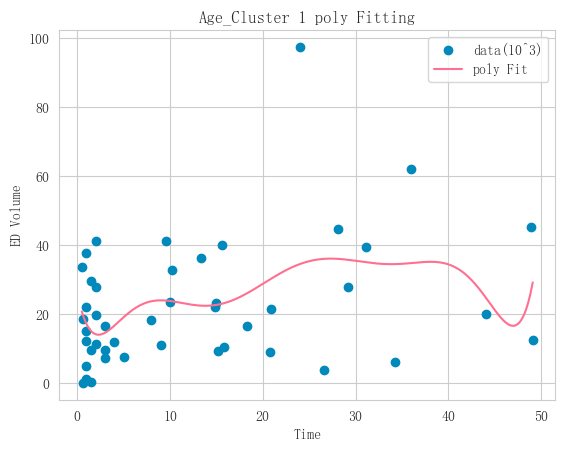

Cluster 1 poly Fit Parameters:
Amplitude (a): 75.08829086620496
Mean (b): 88.71331869114982
Standard Deviation (c): 48.00894601384359


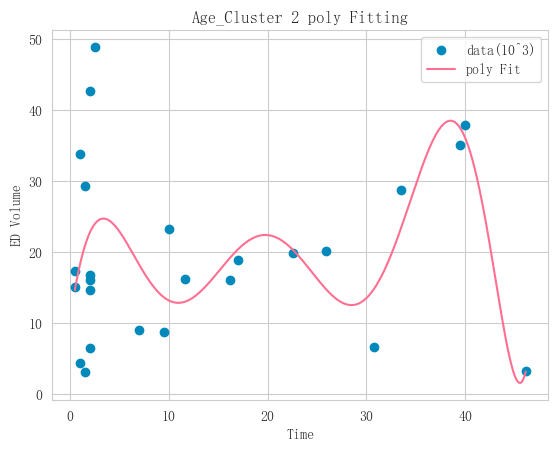

Cluster 2 poly Fit Parameters:
Amplitude (a): 75.08829086620496
Mean (b): 88.71331869114982
Standard Deviation (c): 48.00894601384359


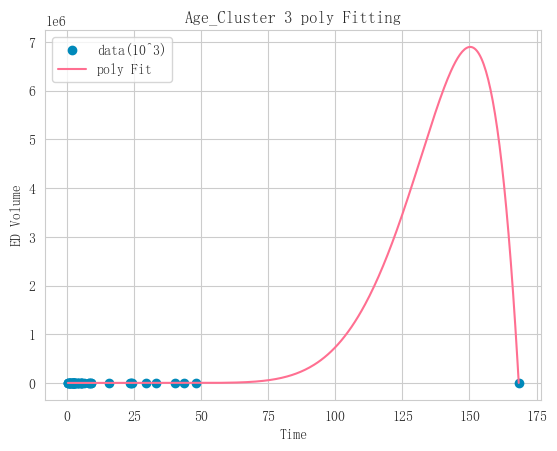

Cluster 3 poly Fit Parameters:
Amplitude (a): 75.08829086620496
Mean (b): 88.71331869114982
Standard Deviation (c): 48.00894601384359


In [128]:



# 遍历每个 cluster 进行拟合和预测
for i in range(4):
    Xi = X[data['cluster'] == i]
    yi = y[data['cluster'] == i]
    # 生成一系列x值用于绘制拟合曲线
    x_fit = np.linspace(Xi.min(), Xi.max(), 400)

    # 使用numpy.polyfit进行多项式回归
    degree = 8  # 指定多项式的次数，可以根据需要更改
    coefficients = np.polyfit(Xi, yi, degree)

    # 使用多项式函数生成预测值
    y_pred_poly_cluster = np.polyval(coefficients, x_fit)



    # 将 y_pred_gaussian_cluster 转换为 DataFrame
    df_y_pred = pd.DataFrame({'ED_Volume': y_pred_poly_cluster})

    # 添加 cluster 列
    df_y_pred['cluster'] = i

    # 生成文件名并保存 DataFrame 到 CSV 文件
    df_y_pred.to_csv(f'./excels/age_ED_Volume_each_poly_cluster[{i}]', index=False)


    # 可视化拟合效果
    plt.scatter(Xi, yi, color='#0089BA')
    plt.plot(x_fit, y_pred_poly_cluster, color='#FF6F91')
    plt.xlabel('Time')
    plt.ylabel('ED Volume')
    plt.title(f'Age_Cluster {i} poly Fitting')
    plt.legend(['data(10^3)', 'poly Fit'])
    plt.savefig(f'./figs/Q2_age_poly_cluster{i}拟合.png')
    plt.show()

    # 输出拟合的参数
    print(f'Cluster {i} poly Fit Parameters:')
    print(f'Amplitude (a): {a}')
    print(f'Mean (b): {b}')
    print(f'Standard Deviation (c): {c}')


C:\Users\wwx\AppData\Local\Temp\ipykernel_50520\1394665141.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/age_三种模型残差分布三点图.png',dmi=400)
C:\Users\wwx\AppData\Local\Temp\ipykernel_50520\1394665141.py:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('./figs/age_三种模型残差分布三点图.png',dmi=400)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


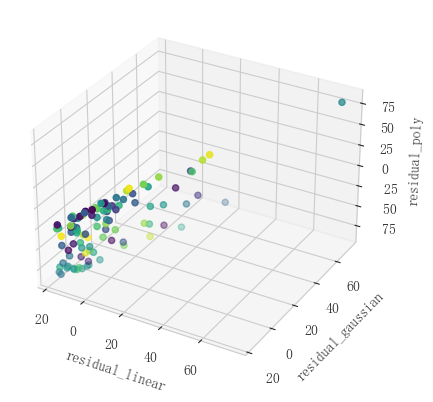

In [129]:
# 绘制三维散点图
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# 创建三个示例数据列表
x = residual_linear / 1000
y = residual_gaussian
z = residual_poly


colors = np.random.rand(100)  # 生成随机颜色值

# 创建一个三维图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图，并指定颜色
scatter = ax.scatter(x[:100], y[:100], z[:100], c=colors, cmap='viridis', marker='o')

# 设置坐标轴标签
ax.set_xlabel('residual_linear')
ax.set_ylabel('residual_gaussian')
ax.set_zlabel('residual_poly')

# 显示图形
plt.savefig('./figs/age_三种模型残差分布三点图.png',dmi=400)
plt.show()

# E2.c

1. 数据整合：从“表1”中提取治疗⽅法数据，并与“表2”中的⽔肿体积数据
进⾏整合。
2. 模型选择：考虑使⽤⼴义线性模型 (GLM) 或混合效应模型对数据进⾏
拟合，以考虑到患者之间的差异。
3. 模型评估：使⽤ANOVA或其他统计测试来评估模型中不同治疗⽅法的
效果。

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'

table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')

In [131]:
import seaborn as sns
table = pd.merge(table1,table2,on='ID')
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\wwx\AppData\Local\Temp\ipykernel_50520\4255917391.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q2_c_相关性分析.png', dmi=400)


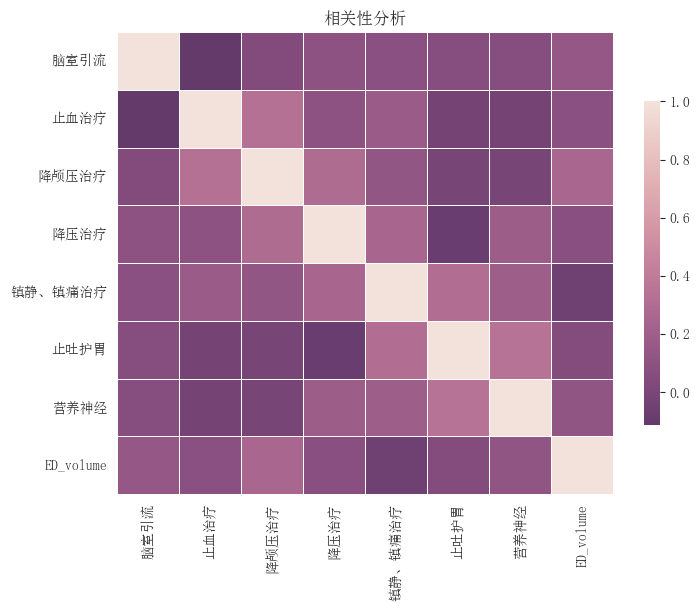

In [132]:
features = [ '脑室引流', '止血治疗', '降颅压治疗', '降压治疗','镇静、镇痛治疗', '止吐护胃', '营养神经','ED_volume']


X = table[features]
# 计算特征之间的斯皮尔曼相关性矩阵
correlation_matrix = X.corr(method='spearman')

correlation_matrix['ED_volume']


# 创建一个热力图，不显示相关性数值
plt.figure(figsize=(8, 6))
# 自定义颜色映射
cmap = sns.cubehelix_palette(as_cmap=True, dark=0.3, light=0.9, reverse=True)  # 调整dark和light参数
sns.heatmap(correlation_matrix, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": 0.7})
plt.title('相关性分析')
plt.savefig('./figs/Q2_c_相关性分析.png', dmi=400)
plt.show()

In [133]:
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')

table = pd.merge(table1,table2,on='ID')


features = [ '脑室引流', '止血治疗', '降颅压治疗', '降压治疗','镇静、镇痛治疗', '止吐护胃', '营养神经']

y_1_table = table.dropna(subset=['ED_volume.1'], inplace=False)
y = y_1_table['ED_volume.1'] - y_1_table['ED_volume']
X = y_1_table[features]
y.shape

(130,)

In [135]:
# 使用混合效应模型对数据拟合，以考虑到患者之间的差异
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 重命名列名为英文
table = table.rename(columns={
    '脑室引流': 'brain_drainage',
    '止血治疗': 'hemostasis',
    '降颅压治疗': 'intracranial_pressure_reduction',
    '降压治疗': 'hypotensive_treatment',
    '镇静、镇痛治疗': 'sedation_analgesia',
    '止吐护胃': 'antiemetic_gastroprotection',
    '营养神经': 'nutritional_support',
    'ED_volume': 'ED_volume'
})

# 定义混合效应模型公式
formula = 'ED_volume ~ brain_drainage + hemostasis + intracranial_pressure_reduction + hypotensive_treatment + sedation_analgesia + antiemetic_gastroprotection + nutritional_support'

# 拟合混合效应模型，以'patient_id'作为分组变量
model = sm.MixedLM.from_formula(formula, data=table, groups=table['ID'])
results = model.fit()

# 打印模型摘要
print(results.summary())
with open('./logs/Mixed Linear Model Regression Results.txt', 'w') as file:
    file.write(results.summary().as_text())


                        Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          ED_volume    
No. Observations:          160              Method:                      REML         
No. Groups:                160              Scale:                       96301350.5124
Min. group size:           1                Log-Likelihood:              -1677.5236   
Max. group size:           1                Converged:                   Yes          
Mean group size:           1.0                                                        
--------------------------------------------------------------------------------------
                                   Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
--------------------------------------------------------------------------------------
Intercept                           3012.505 3402.528  0.885 0.376 -3656.327  9681.337
brain_drainage                     17080.303 4603.311  3.710 0.000  

D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [136]:
#多元回归分析
import statsmodels.api as sm

# 添加截距列
X = sm.add_constant(X)  # 这将在X矩阵中添加一个截距列

# 拟合多元线性回归模型
model_sm = sm.OLS(y, X).fit()

# 打印回归分析摘要
print(model_sm.summary())
with open('./logs/OLS Regression Results.txt', 'w',encoding='utf8') as file:
    file.write(model_sm.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.530
Date:                Mon, 25 Sep 2023   Prob (F-statistic):             0.0183
Time:                        12:22:15   Log-Likelihood:                -1394.7
No. Observations:                 130   AIC:                             2805.
Df Residuals:                     122   BIC:                             2828.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2467.8280   5891.004     -0.419      0.6

## E2.d
1. 数据整合：将“表1”和“表2”中的数据整合到⼀个数据框中。
2. 模型选择：使⽤多重回归分析来探索⾎肿体积、⽔肿体积和各种治疗
⽅法之间的关系。
3. 模型评估：使⽤F统计量、t统计量和R-squared值来评估模型的质量和
单个系数的显著性。

In [137]:
table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')

table_d = pd.merge(table1,table2,on='ID')
table_d.to_excel(f'Q2d)_table_temp.xlsx',index=False)

In [138]:
Q2d_table = pd.read_excel('./excels/Q2d)_table_temp.xlsx')
Q2d_table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
#使⽤多重回归分析来探索⾎肿体积、⽔肿体积和各种治疗 ⽅法之间的关系。
features = [ '脑室引流', '止血治疗', '降压治疗','镇静、镇痛治疗']
HM_v = Q2d_table['HM_volume']
ED_v = Q2d_table['ED_volume']
therapeutic_methods = Q2d_table[features]

In [140]:
# 多元线性回归
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [142]:
# 创建一个包含自变量和因变量的DataFrame
data = pd.DataFrame({'HM_v': HM_v, 'ED_v': ED_v, 'therapeutic_methods': therapeutic_methods['脑室引流'],})

# 添加常数项（截距）到自变量
X = sm.add_constant(data[['HM_v', 'ED_v']])

# 因变量
Y = data['therapeutic_methods']

# 创建一个多元线性回归模型
model = sm.OLS(Y, X).fit()

# 获取回归结果摘要
summary = model.summary()

# 打印回归结果摘要
print(summary)
with open('./logs/Q2d OLS Regression Results.txt', 'w',encoding='utf8') as file:
    file.write(model_sm.summary().as_text())

                             OLS Regression Results                            
Dep. Variable:     therapeutic_methods   R-squared:                       0.088
Model:                             OLS   Adj. R-squared:                  0.077
Method:                  Least Squares   F-statistic:                     7.592
Date:                 Mon, 25 Sep 2023   Prob (F-statistic):           0.000712
Time:                         12:22:34   Log-Likelihood:                 7.3258
No. Observations:                  160   AIC:                            -8.652
Df Residuals:                      157   BIC:                            0.5739
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0232      0.029     -0.79

In [157]:
import pandas as pd
# 将数据转换成字典格式
data_dict = {
    '年龄': 0.23356131134009436,
    '糖尿病史': 0.31332834082139754,
    '冠心病史': 0.3131265691541534,
    '吸烟史': -0.2053696452985496,
    '饮酒史': -0.2548849394345527,
    'HM_volume': 0.385256804156474,
    'ED_volume': 0.24099673305463595,
    'ED_PCA_R_Ratio': -0.21496145604612807,
    'original_shape_Maximum2DDiameterColumn': 0.2386531487494406,
    'original_shape_MeshVolume': 0.2017532396056787,
    'original_shape_SurfaceArea': 0.23422694384293383,
    'original_shape_SurfaceVolumeRatio': -0.2016593655111006,
    'original_shape_VoxelVolume': 0.20263677413627465,
    'NCCT_original_firstorder_Entropy': -0.24728859293510594,
    'NCCT_original_firstorder_Minimum': -0.22910256322114436,
    'NCCT_original_firstorder_Range': 0.30870457107435795,
    'NCCT_original_firstorder_Uniformity': 0.24001500215683919,
    '90天mRS': 1.0
}
data_dict_1 = {
    '年龄': 0.23356131134009436,
    '高血压病史': 0.09008864238635042,
    '卒中病史': 0.0676476084218266,
    '糖尿病史': 0.31332834082139754,
    '房颤史': 0.1556198346206145,
    '冠心病史': 0.3131265691541534,
    '吸烟史': -0.2053696452985496,
    '饮酒史': -0.2548849394345527,
    'HM_volume': 0.385256804156474,
    'ED_volume': 0.24099673305463595,
    'HM_ACA_R_Ratio': -0.030975511139461138,
    'HM_MCA_R_Ratio': -0.030646622170889645,
    'HM_PCA_R_Ratio': -0.17477727298421933,
    'HM_Pons_Medulla_R_Ratio': -0.07793250380890893,
    'HM_Cerebellum_R_Ratio': -0.092279734599636,
    'HM_ACA_L_Ratio': 0.1784359356728696,
    'HM_MCA_L_Ratio': 0.04505554740058538,
    'HM_PCA_L_Ratio': 0.06756454634800081,
    'HM_Pons_Medulla_L_Ratio': 0.012260399914876671,
    'HM_Cerebellum_L_Ratio': 0.0315886563828695,
    'ED_ACA_R_Ratio': 0.04781112002070967,
    'ED_MCA_R_Ratio': -0.02846806664369994,
    'ED_PCA_R_Ratio': -0.21496145604612807,
    'ED_Pons_Medulla_R_Ratio': -0.11202394727726943,
    'ED_Cerebellum_R_Ratio': 0.022097033675488088,
    'ED_ACA_L_Ratio': 0.12505619739314322,
    'ED_MCA_L_Ratio': 0.06257572236642961,
    'ED_PCA_L_Ratio': 0.02679048591284309,
    'ED_Pons_Medulla_L_Ratio': -0.01589030862551477,
    'ED_Cerebellum_L_Ratio': 0.06423901786963374,
    'original_shape_Elongation': -0.006152673921872398,
    'original_shape_Flatness': 0.02364051508784449,
    'original_shape_LeastAxisLength': 0.15667751710310213,
    'original_shape_MajorAxisLength': 0.04273786393565461,
    'original_shape_Maximum2DDiameterColumn': 0.2386531487494406,
    'original_shape_Maximum2DDiameterRow': 0.15909886947802518,
    'original_shape_Maximum2DDiameterSlice': 0.12115807310978198,
    'original_shape_Maximum3DDiameter': 0.11636548500676612,
    'original_shape_MeshVolume': 0.2017532396056787,
    'original_shape_MinorAxisLength': 0.1367674546267448,
    'original_shape_Sphericity': -0.15369048547530922,
    'original_shape_SurfaceArea': 0.23422694384293383,
    'original_shape_SurfaceVolumeRatio': -0.2016593655111006,
    'original_shape_VoxelVolume': 0.20263677413627465,
    'NCCT_original_firstorder_10Percentile': -0.15261344655233142,
    'NCCT_original_firstorder_90Percentile': -0.09529428991398839,
    'NCCT_original_firstorder_Energy': 0.17363786056199293,
    'NCCT_original_firstorder_Entropy': -0.24728859293510594,
    'NCCT_original_firstorder_InterquartileRange': 0.16124108959561576,
    'NCCT_original_firstorder_Kurtosis': 0.13222235608131022,
    'NCCT_original_firstorder_Maximum': 0.11912316135106579,
    'NCCT_original_firstorder_MeanAbsoluteDeviation': 0.1517577638109347,
    'NCCT_original_firstorder_Mean': -0.13047503993817783,
    'NCCT_original_firstorder_Median': -0.13997681845103613,
    'NCCT_original_firstorder_Minimum': -0.22910256322114436,
    'NCCT_original_firstorder_Range': 0.30870457107435795,
    'NCCT_original_firstorder_RobustMeanAbsoluteDeviation': 0.14291445601773634,
    'NCCT_original_firstorder_RootMeanSquared': -0.12264762775775837,
    'NCCT_original_firstorder_Skewness': 0.15280178141362005,
    'NCCT_original_firstorder_Uniformity': 0.24001500215683919,
    'NCCT_original_firstorder_Variance': 0.14805016650738276,
    '90天mRS': 1.0
}
# 将字典转换成DataFrame对象
df = pd.DataFrame(data_dict, index=[0])
# 查看数据
df

,年龄,糖尿病史,冠心病史,吸烟史,饮酒史,HM_volume,ED_volume,ED_PCA_R_Ratio,original_shape_Maximum2DDiameterColumn,original_shape_MeshVolume,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,NCCT_original_firstorder_Entropy,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_Uniformity,90天mRS
0,0.233561,0.313328,0.313127,-0.20537,-0.254885,0.385257,0.240997,-0.214961,0.238653,0.201753,0.234227,-0.201659,0.202637,-0.247289,-0.229103,0.308705,0.240015,1.0


C:\Users\wwx\AppData\Local\Temp\ipykernel_50520\3738726754.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q3/不同特征与90天mRS的相关性.png',dmi=400)
C:\Users\wwx\AppData\Local\Temp\ipykernel_50520\3738726754.py:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('./figs/Q3/不同特征与90天mRS的相关性.png',dmi=400)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


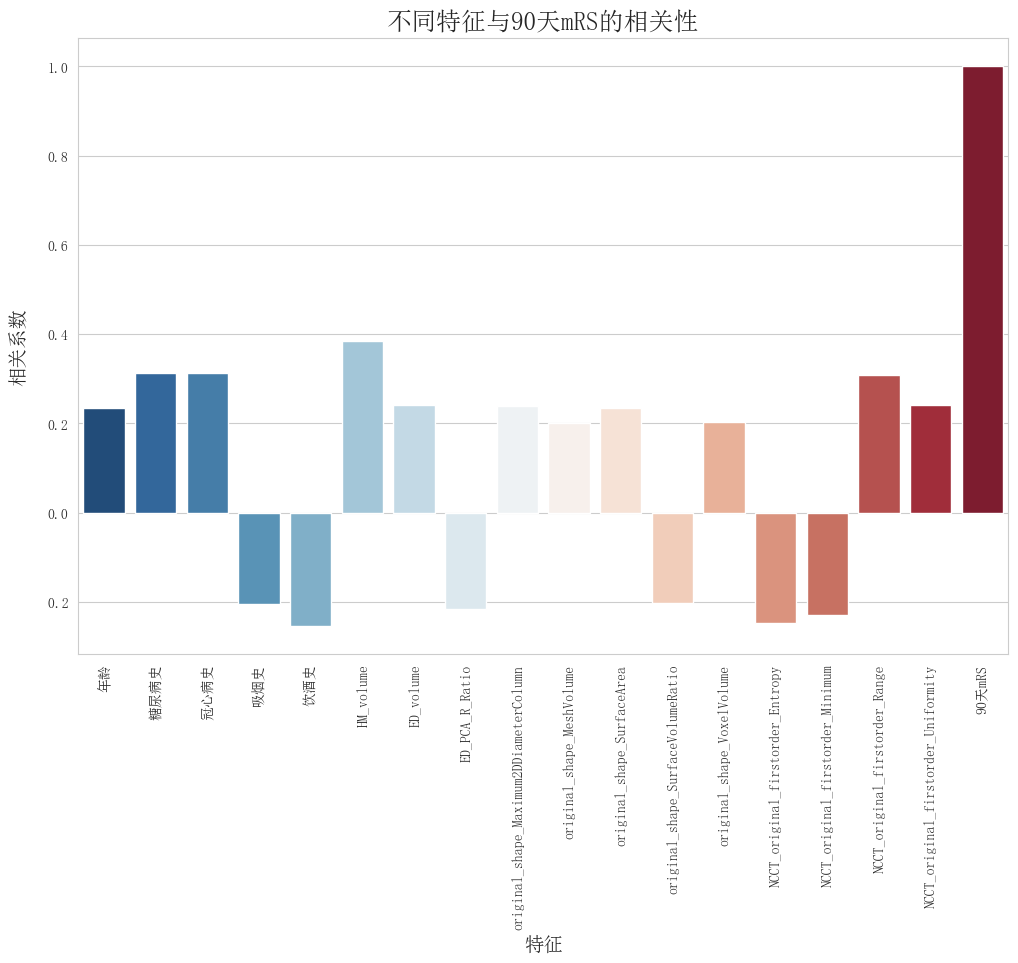

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'SimSun'
# 设置图表的大小和风格
plt.figure(figsize=(12, 8))
# sns.set_style('whitegrid')
# 绘制柱状图
sns.barplot(x=df.columns, y=df.iloc[0], palette='RdBu_r')
# 添加标题和坐标轴标签
plt.title('不同特征与90天mRS的相关性', fontsize=18)
plt.xlabel('特征', fontsize=14)
plt.ylabel('相关系数', fontsize=14)
# 旋转x轴的刻度标签，以便更清楚地显示
plt.xticks(rotation=90)
plt.savefig('./figs/Q3/不同特征与90天mRS的相关性.png',dmi=400)
# 显示图表
plt.show()